In [4]:
pip install numpy matplotlib pandas ace_tools

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.6 MB 10.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.5/12.6 MB 11.1 MB/s eta 0:00:01
   ----------------------- ---------------- 7.3/12.6 MB 12.0 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.6 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.6 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 12.8 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\sergi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


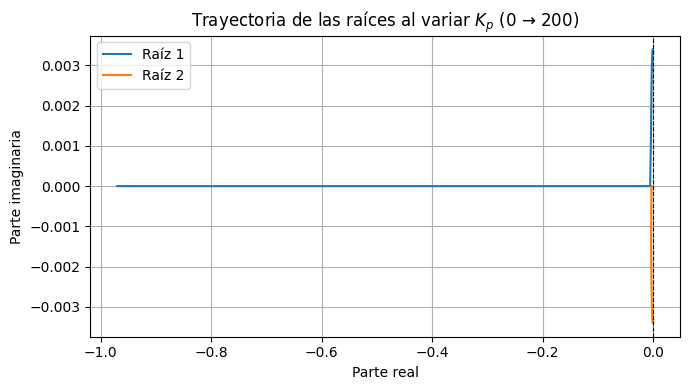

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def coeffs(Kp):
    """
    Devuelve los coeficientes [a2, a1, a0] del polinomio
    s^2 + (0.01744 + 0.004143*Kp) s + (1.76e-5 + 6.466e-6*Kp) = 0
    """
    a2 = 1.0
    a1 = 0.004853 * Kp
    a0 = 1.104e-5 + 3.687e-6 * Kp
    return [a2, a1, a0]

# Vector de Kp: 0 → 200 (1001 puntos para suavidad)
Kp_vals = np.linspace(0, 200, 1001)

# Calcula raíces para cada Kp  →  shape = (1001, 2)
roots = np.array([np.roots(coeffs(k)) for k in Kp_vals])

# Separa las dos ramas
root1 = roots[:, 0]
root2 = roots[:, 1]

# === Gráfica del root-locus aproximado ===
plt.figure(figsize=(7, 4))
plt.plot(root1.real, root1.imag, label='Raíz 1')
plt.plot(root2.real, root2.imag, label='Raíz 2')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # eje imaginario
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.title('Trayectoria de las raíces al variar $K_p$ (0 → 200)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import pandas as pd      # <-- basta con pandas para la tabla

def coeffs(Kp):
    a2 = 1.0
    a1 = 0.004853 * Kp
    a0 = 1.104e-5 + 3.687e-6 * Kp
    return [a2, a1, a0]

Kp_vals = np.linspace(0, 200, 101)   # 0,2,4,…,200
rows = []

for k in Kp_vals:
    r = np.roots(coeffs(k))
    rows.append({
        "Kp": round(k, 2),
        "Root1_real": r[0].real,
        "Root1_imag": r[0].imag,
        "Root2_real": r[1].real,
        "Root2_imag": r[1].imag
    })

df = pd.DataFrame(rows)

# ── Formas de ver o guardar la tabla ───────────────────────────
print(df)                 # opción 1: mostrar por consola

# df.to_csv("raices_vs_Kp.csv", index=False)     # opción 2: CSV
# df.to_excel("raices_vs_Kp.xlsx", index=False)  # opción 3: Excel


        Kp  Root1_real  Root1_imag  Root2_real  Root2_imag
0      0.0   -0.000000    0.003323    0.000000   -0.003323
1      2.0   -0.007120    0.000000   -0.002586    0.000000
2      4.0   -0.017978    0.000000   -0.001434    0.000000
3      6.0   -0.027931    0.000000   -0.001187    0.000000
4      8.0   -0.037750    0.000000   -0.001074    0.000000
..     ...         ...         ...         ...         ...
96   192.0   -0.931004    0.000000   -0.000772    0.000000
97   194.0   -0.940710    0.000000   -0.000772    0.000000
98   196.0   -0.950416    0.000000   -0.000772    0.000000
99   198.0   -0.960122    0.000000   -0.000772    0.000000
100  200.0   -0.969828    0.000000   -0.000772    0.000000

[101 rows x 5 columns]


G(0) = 0.33397
 Kp   T(0)   e_ss
  0 0.0000 1.0000
  1 0.2504 0.7496
  5 0.6254 0.3746
 10 0.7696 0.2304
 25 0.8930 0.1070
 50 0.9435 0.0565
 75 0.9616 0.0384
100 0.9709 0.0291
150 0.9804 0.0196
200 0.9852 0.0148


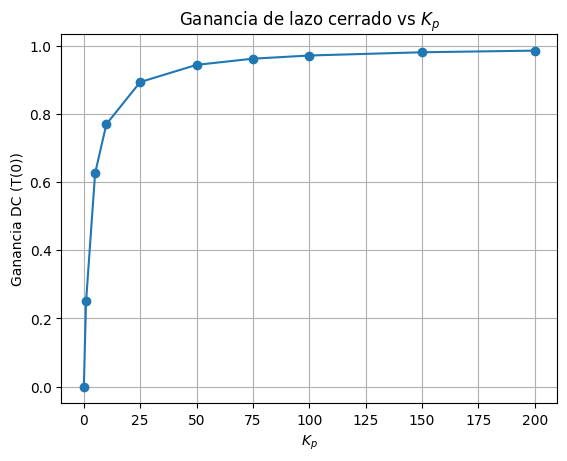

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # opcional, solo para graficar

# --- 1. Planta ---
G0 = 3.687e-6 / 1.104e-5          # ganancia estática: ≈ 0.33397
print(f"G(0) = {G0:.5f}")

# --- 2. Vector de Kp ---
# Elige los valores que quieras analizar:
Kp_vals = np.array([0, 1, 5, 10, 25, 50, 75, 100, 150, 200])

# --- 3. Ganancia de lazo cerrado T(0) para cada Kp ---
T0 = (Kp_vals * G0) / (1 + Kp_vals * G0)

# --- 4. Error estacionario para un escalón de amplitud 1 (opcional) ---
ess = 1 - T0

# --- 5. Tabla resumen ---
df = pd.DataFrame({
    "Kp": Kp_vals,
    "T(0)": T0.round(4),
    "e_ss": ess.round(4)          # error en régimen
})
print(df.to_string(index=False))

# --- 6. Gráfica opcional ---
plt.figure()
plt.plot(Kp_vals, T0, "o-")
plt.xlabel("$K_p$")
plt.ylabel("Ganancia DC (T(0))")
plt.title("Ganancia de lazo cerrado vs $K_p$")
plt.grid(True)
plt.show()
